# Máquinas de Vectores de Soporte (SVM)

**Las máquinas de vectores de soporte (SVM)** son una categoría muy utilizada y poderosa de algoritmos de aprendizaje automático. Hay muchas variaciones en la idea básica de un SVM. Un SVM intenta **separar al máximo** las clases al encontrar el **vector de soporte** con la tasa de error más baja o la separación máxima. Los SVM pueden usar muchos tipos de **funciones del núcleo**. Las funciones del núcleo más comunes son **lineal** y la **función de base radial** o **RBF**. La función de base lineal intenta separar las clases al encontrar hiperplanos en el espacio de características que separan las clases al máximo. El RBF utiliza un conjunto de núcleos locales en forma de Gauss para encontrar una separación no lineal de las clases.


Consiste en seleccionar como clasificador óptimo al que se conoce como maximal margin hyperplane o hiperplano óptimo de separación, que se corresponde con el hiperplano que se encuentra más alejado de todas las observaciones de entrenamiento.
Para obtenerlo, se tiene que calcular la distancia perpendicular de cada observación a un determinado hiperplano. La menor de estas distancias (conocida como margen) determina como de alejado está el hiperplano de las observaciones de entrenamiento.

*https://rpubs.com/Joaquin_AR/267926

## 1. Librerias y configuraciones previas


In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib


# Gestion de librerias
# ==============================================================================
from importlib import reload


# Matemáticas y estadísticas
# ==============================================================================
import math


# Preprocesado y modelado
# ==============================================================================
import math

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


#Evaluación del modelo
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


#Creación de modelo
from sklearn import svm


#configuracion de hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 2. Funciones

In [2]:
#reload(utils.funciones)

# Funciones externas
# ==============================================================================
from utils.funciones import multiple_plot, plot_roc_curve

## 3. Carga del dataset

In [3]:
#Se crea un dataframe d con los datos obtenidos de archivo de entrada
d=pd.read_csv('./datasets/02_GermanCredit_Prep.csv')

In [4]:
## Cargar datos con colab
## =============================================================================

#from google.colab import drive 
#import os

#drive.mount('/gdrive')

In [5]:
#os.chdir("/gdrive/MyDrive/ModelosCuantitativosPython/Notebooks")
#!ls

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   checking_account_status   1138 non-null   object
 1   loan_duration_mo          1138 non-null   int64 
 2   credit_history            1138 non-null   object
 3   purpose                   1138 non-null   object
 4   loan_amount               1138 non-null   int64 
 5   savings_account_balance   1138 non-null   object
 6   time_employed_yrs         1138 non-null   object
 7   payment_pcnt_income       1138 non-null   int64 
 8   gender_status             1138 non-null   object
 9   other_signators           1138 non-null   object
 10  time_in_residence         1138 non-null   int64 
 11  property                  1138 non-null   object
 12  age_yrs                   1138 non-null   int64 
 13  other_credit_outstanding  1138 non-null   object
 14  home_ownership          

## 4. Visualización de datos

### Variables de entrada

In [7]:
#Lista de variables categóricas
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head(2)

,checking_account_status,credit_history,purpose,savings_account_balance,time_employed_yrs,gender_status,other_signators,property,other_credit_outstanding,home_ownership,job_category,telephone,foreign_worker
0,< 0 DM,critical account - other non-bank loans,car,< 100 DM,1 - 4 years,female-divorced/separated/married,co-applicant,real estate,none,own,skilled,none,yes
1,< 0 DM,current loans paid,car,< 100 DM,1 - 4 years,male-married/widowed,none,real estate,none,own,unskilled-resident,none,yes


In [8]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()

d[numCols].head(2)

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,bad_credit
0,12,3499,3,2,29,2,1,1
1,12,1168,4,3,27,1,1,0


In [9]:
##Visualización de frecuencia de instancias para variables categóricas
#multiple_plot(3, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

In [10]:
##Visualización de variables numéricas
#multiple_plot(1, d , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)

In [11]:
#Eliminar la variable de salida de la lista de variable numéricas
numCols.remove('bad_credit')

### Variable de salida

In [12]:
# Distriución de la variable de salida

d.groupby('bad_credit').bad_credit.count().sort_values(ascending=False)

bad_credit
0    569
1    569
Name: bad_credit, dtype: int64

In [13]:
##Visualización de la variable de salida
#multiple_plot(1, d , None, 'bad_credit', 'countplot', 'Gráfica de frecuencia de bad Credit',0)

## 5. Transformación de datos

### Creación de variables Dummies 

In [14]:
# Aplicación de la función de usuario Dummies: one-hot encoding

d =pd.get_dummies(d, drop_first=1)

d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 46 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   loan_duration_mo                                        1138 non-null   int64
 1   loan_amount                                             1138 non-null   int64
 2   payment_pcnt_income                                     1138 non-null   int64
 3   time_in_residence                                       1138 non-null   int64
 4   age_yrs                                                 1138 non-null   int64
 5   number_loans                                            1138 non-null   int64
 6   dependents                                              1138 non-null   int64
 7   bad_credit                                              1138 non-null   int64
 8   checking_account_status_< 0 DM                          11

## 6. Creación del modelo

### Dividir el conjunto de datos

In [15]:
#Se crea una lista con todas las varibles de entrada

vDep = list(d.columns)
vDep.remove('bad_credit')

#Se establece las variables de entrada 'X' y la variable de salida 'y'
X = d.drop(columns ='bad_credit')
y = d['bad_credit']

In [16]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida 

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

### Escalar Variables

In [17]:
#Se establecen las variables numéricas a escalar

#Num_vars se le asigna la lista con las variables numerivas para posteriormente escalarlas
num_vars = numCols

print(num_vars)

['loan_duration_mo', 'loan_amount', 'payment_pcnt_income', 'time_in_residence', 'age_yrs', 'number_loans', 'dependents']


In [18]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

X_train[num_vars].head(2)

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents
9,0.0294,0.1319,0.3333,0.3333,0.1667,0.0000,0.0000
798,0.5588,0.5622,0.3333,1.0000,0.4630,0.0000,1.0000


### Creación del modelo

#### 6.1. Lineal y método de retención (*holdout method*)

##### Creación y entrenamiento del modelo

In [19]:
#Creación del modelo 

modelSVC = svm.SVC(kernel='linear')

#Entrenamiento del modelo con 80% de training
modelSVC.fit(X_train, y_train)

SVC(kernel='linear')

In [20]:
y_pred = modelSVC.predict(X_test)

##### Evaluación del modelo

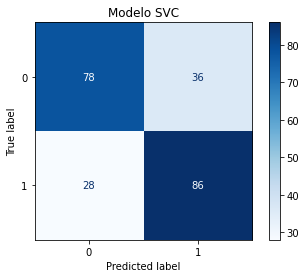

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       114
           1       0.70      0.75      0.73       114

    accuracy                           0.72       228
   macro avg       0.72      0.72      0.72       228
weighted avg       0.72      0.72      0.72       228



In [21]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear la visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))

# Mostrar la visualización
disp.plot(cmap='Blues')

# Configurar el título
plt.title('Modelo SVC')

# Mostrar la figura
plt.show()

# Mostrar el informe de clasificación
print(classification_report(y_test, y_pred))

In [22]:
#f1-Score
print("f1-score:",metrics.f1_score(y_test, y_pred))

f1-score: 0.7288135593220338


In [23]:
#Crear un dataframe para guardar los resultados
dfResults = pd.DataFrame(columns=['Tipo', 'f1-score'])


dfResults = dfResults.append({'Tipo': 'Lineal y método de retención'
                              , 'f1-score': metrics.f1_score(y_test, y_pred)}, ignore_index=True)

In [24]:
dfResults

,Tipo,f1-score
0,Lineal y método de retención,0.7288


#### 6.2. Lineal y validación cruzada (*Cross validation*)

##### Creación y entrenamiento del modelo

In [25]:
#Se establece las variables de entrada 'X' y la variable de salida 'y'

X = d.drop(columns ='bad_credit')
y = d['bad_credit']

# la validación cruzada se realiza sobre todo el dataset
X_Completo = X
y_Completo = y

In [26]:
#Se establecen las variables numéricas a escalar

#Num_vars se le asigna la lista con las variables numerivas para posteriormente escalarlas
num_vars = numCols

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_Completo[num_vars] = scaler.fit_transform(X_Completo[num_vars])

X_Completo[num_vars].head()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents
0,0.1176,0.2356,0.6667,0.3333,0.1667,0.3333,0.0000
1,0.1176,0.0619,1.0000,0.6667,0.1296,0.0000,0.0000
2,0.2941,0.1487,1.0000,0.3333,0.1667,0.0000,0.0000
3,0.0735,0.0783,1.0000,0.3333,0.1111,0.0000,0.0000
4,0.3382,0.6167,0.3333,0.3333,0.1296,0.3333,0.0000


In [27]:
# Guardar el scaler
joblib.dump(scaler, './modelos/scaler/minmaxFull_GermanCredits.pkl')

['./modelos/scaler/minmaxFull_GermanCredits.pkl']

In [28]:
CV = 10 #Folks:  Pliegues
scoring = 'f1'


entries = []
accuracies = cross_val_score(modelSVC, X_Completo, y_Completo, cv=CV, scoring=scoring)

for fold_idx, accuracy in enumerate(accuracies):
    entries.append(( fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['fold_idx', 'f1-Score'])

#### Evaluación del modelo

In [29]:
print(cv_df)
print('f1-score:', cv_df['f1-Score'].mean())

   fold_idx  f1-Score
0         0    0.7200
1         1    0.7965
2         2    0.7652
3         3    0.7027
4         4    0.7290
5         5    0.7000
6         6    0.7563
7         7    0.7559
8         8    0.7478
9         9    0.7627
f1-score: 0.7436098217797752


### 7. Afinando el modelo (tuning)

Entre sus parámetros, encontramos:

- C: parámetro de regularización.
- kernel: especifica el tipo de kernel usado por el algoritmo (lineal, polinómico, radial, etc.).
- degree: grado de la función con kernel polinómico.
- gamma: coeficiente del kernel para ‘rbf’, ‘poly’ y ‘sigmoid’.
- probability: indica si se permite la estimación de probabilidades.
- max_iter: límite de iteraciones.
- decision_function_shape: permite establecer el método one-vs-one o one-vs-all.
- random_state: semilla para el generador de número pseudoaleatorios.

El parámetro "C" es el inverso del parámetro λ de regularización por lo cual, si tenemos un valor alto de nuestro parámetro tendremos una mayor varianza y la regularización será menor, mientras que por el contrario, si tenemos un valor bajo, tendremos un mayor efecto de la regularización. Ver: https://dzone.com/articles/support-vector-machines-tutorial

#### 7.1. Lineal e hiperparámetro *C*  (con validación cruzada - *Cross validation*)

##### Identificacion del mejor hiperparametro *C*

In [30]:
#Definicion del modelo
modelsvmL = svm.SVC(kernel='linear', probability = True, random_state = 0)

# Establecemos un grid con los valores de coste que queremos evaluar
grid_hiperparametros = {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7, 10]} 

# definicion de la variable con el número de pliegues
CV = 10

# las metricas sobre las se evaluará el modelo
scoring = 'f1'

# Definimos la busqueda mediante 10-fold CV
grid_svmL = GridSearchCV(estimator = modelsvmL
                             , param_grid = grid_hiperparametros 
                             , cv = CV
                             , scoring = scoring
                             , return_train_score = True
                             , verbose=4)



# Aplicamos la busqueda
grid_svmL.fit(X_Completo, y_Completo)

#gridsvmL.cv_results_.keys()

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END ......C=0.001;, score=(train=0.732, test=0.733) total time=   0.9s
[CV 2/10] END ......C=0.001;, score=(train=0.724, test=0.783) total time=   1.0s
[CV 3/10] END ......C=0.001;, score=(train=0.732, test=0.712) total time=   0.8s
[CV 4/10] END ......C=0.001;, score=(train=0.735, test=0.683) total time=   0.9s
[CV 5/10] END ......C=0.001;, score=(train=0.730, test=0.661) total time=   0.7s
[CV 6/10] END ......C=0.001;, score=(train=0.732, test=0.704) total time=   0.8s
[CV 7/10] END ......C=0.001;, score=(train=0.725, test=0.760) total time=   0.8s
[CV 8/10] END ......C=0.001;, score=(train=0.731, test=0.729) total time=   0.7s
[CV 9/10] END ......C=0.001;, score=(train=0.000, test=0.000) total time=   0.7s
[CV 10/10] END .....C=0.001;, score=(train=0.667, test=0.663) total time=   0.8s
[CV 1/10] END .......C=0.01;, score=(train=0.720, test=0.740) total time=   0.6s
[CV 2/10] END .......C=0.01;, score=(train=0.7

[CV 2/10] END ..........C=7;, score=(train=0.765, test=0.789) total time=   2.5s
[CV 3/10] END ..........C=7;, score=(train=0.773, test=0.748) total time=   1.7s
[CV 4/10] END ..........C=7;, score=(train=0.765, test=0.709) total time=   2.1s
[CV 5/10] END ..........C=7;, score=(train=0.763, test=0.722) total time=   1.9s
[CV 6/10] END ..........C=7;, score=(train=0.785, test=0.712) total time=   1.7s
[CV 7/10] END ..........C=7;, score=(train=0.770, test=0.750) total time=   1.9s
[CV 8/10] END ..........C=7;, score=(train=0.772, test=0.740) total time=   1.8s
[CV 9/10] END ..........C=7;, score=(train=0.769, test=0.765) total time=   2.2s
[CV 10/10] END .........C=7;, score=(train=0.773, test=0.752) total time=   2.0s
[CV 1/10] END .........C=10;, score=(train=0.761, test=0.720) total time=   2.5s
[CV 2/10] END .........C=10;, score=(train=0.767, test=0.789) total time=   2.6s
[CV 3/10] END .........C=10;, score=(train=0.778, test=0.759) total time=   2.6s
[CV 4/10] END .........C=10;

GridSearchCV(cv=10,
             estimator=SVC(kernel='linear', probability=True, random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7,
                               10]},
             return_train_score=True, scoring='f1', verbose=4)

In [31]:
# Resultados
resultados = pd.DataFrame(grid_svmL.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
6,2,0.7437,0.0241,0.7668,0.0075
5,1,0.7436,0.0288,0.7662,0.0064
8,4,0.7413,0.0256,0.7692,0.0059
10,7,0.7408,0.0242,0.7691,0.0070


In [32]:
# Obtener los resultados del grid search
results_grid_svmL = pd.DataFrame(grid_svmL.cv_results_)

# Seleccionar las columnas deseadas
columns_grid_svmL = ['param_C']  + \
                    ['mean_test_score', 'std_test_score']  + \
                    [f'split{i}_test_score' for i in range(CV)]

# Filtrar y mostrar los resultados
results_grid_svmL_filtered = results_grid_svmL[columns_grid_svmL]

# Crear la columna scoreWithStd: f1 / std
results_grid_svmL_filtered['scoreWithStd'] = results_grid_svmL_filtered.apply(
    lambda row: row['mean_test_score'] / row['std_test_score'] if row['std_test_score'] != 0 else 0,
    axis=1
)

# Encuentra el índice del máximo valor en la columna scoreWithStd
indice_max_scoreWithStd = results_grid_svmL_filtered['scoreWithStd'].idxmax()

# Mostrar los scores promedios por cada parámetro
print(results_grid_svmL_filtered[['param_C', 'mean_test_score', 'std_test_score', 'scoreWithStd']])

   param_C  mean_test_score  std_test_score  scoreWithStd
0   0.0010           0.6426          0.2174        2.9556
1   0.0100           0.7154          0.0285       25.0754
2   0.1000           0.7295          0.0296       24.6163
3   0.3000           0.7329          0.0305       24.0414
4   0.5000           0.7365          0.0263       28.0509
5        1           0.7436          0.0288       25.8081
6        2           0.7437          0.0241       30.8075
7        3           0.7398          0.0242       30.5156
8        4           0.7413          0.0256       28.9959
9        5           0.7407          0.0236       31.3688
10       7           0.7408          0.0242       30.6314
11      10           0.7378          0.0288       25.5839


In [33]:
# Top 3 de los mejores scores
results_grid_svmL_filtered.sort_values(by='scoreWithStd', ascending=False).head(3)[
    ['param_C',  'mean_test_score', 'std_test_score', 'scoreWithStd']]

,param_C,mean_test_score,std_test_score,scoreWithStd
9,5,0.7407,0.0236,31.3688
6,2,0.7437,0.0241,30.8075
10,7,0.7408,0.0242,30.6314


#### Evaluación del modelo

In [34]:
# Seleccionar el registro correspondiente al índice máximo
registro_max_scoreWithStd = results_grid_svmL_filtered.loc[indice_max_scoreWithStd]

registro_max_scoreWithStd.transpose()

param_C                   5
mean_test_score      0.7407
std_test_score       0.0236
split0_test_score    0.7200
split1_test_score    0.7895
split2_test_score    0.7478
split3_test_score    0.7091
split4_test_score    0.7222
split5_test_score    0.7119
split6_test_score    0.7500
split7_test_score    0.7460
split8_test_score    0.7544
split9_test_score    0.7563
scoreWithStd        31.3688
Name: 9, dtype: object

In [35]:
# Guardar los resultados en el dataframe de resultados 
dfResults = dfResults.append(pd.DataFrame(
                {'Tipo': ['Lineal e hiperparámetro C con validación cruzada'],
                 'f1-score':results_grid_svmL_filtered.loc[indice_max_scoreWithStd]['mean_test_score']}))
dfResults

,Tipo,f1-score
0,Lineal y método de retención,0.7288
0,Lineal e hiperparámetro C con validación cruzada,0.7407


#### Creación del modelo final

In [36]:
# Usar los mejores parámetros para crear el modelo
modelsvmL.set_params(kernel='linear'
                     , C = results_grid_svmL_filtered.loc[indice_max_scoreWithStd]['param_C'])

modelsvmL.fit(X_Completo, y_Completo)

SVC(C=5, kernel='linear', probability=True, random_state=0)

#### 7.2. Polinómico e hiperparámetros: *C* y *degree*  (con validación cruzada  - *Cross validation*)

##### Identificación del mejor hiperparametro *C* y *degree*

In [37]:
#Definición del modelo
modelsvmP = svm.SVC(kernel='poly', probability = True, random_state = 0)

# Establecemos un grid con los valores de coste que queremos evaluar
grid_hiperparametros = {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7, 10],
                        'degree': [2, 3]} 

# definicion de la variable con el número de pliegues
CV = 10

# las metricas sobre las se evaluará el modelo
scoring = 'f1'

# Definimos la busqueda mediante 10-fold CV
grid_svmP = GridSearchCV(estimator = modelsvmP 
                             , param_grid = grid_hiperparametros 
                             , cv = CV
                             , scoring = scoring
                             , return_train_score = True
                             , verbose=4)


# Aplicamos la busqueda
grid_svmP.fit(X_Completo, y_Completo)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10] END C=0.001, degree=2;, score=(train=0.735, test=0.705) total time=   0.6s
[CV 2/10] END C=0.001, degree=2;, score=(train=0.721, test=0.779) total time=   0.5s
[CV 3/10] END C=0.001, degree=2;, score=(train=0.735, test=0.736) total time=   0.6s
[CV 4/10] END C=0.001, degree=2;, score=(train=0.735, test=0.692) total time=   0.6s
[CV 5/10] END C=0.001, degree=2;, score=(train=0.740, test=0.650) total time=   0.6s
[CV 6/10] END C=0.001, degree=2;, score=(train=0.739, test=0.687) total time=   0.5s
[CV 7/10] END C=0.001, degree=2;, score=(train=0.730, test=0.776) total time=   0.5s
[CV 8/10] END C=0.001, degree=2;, score=(train=0.734, test=0.707) total time=   0.5s
[CV 9/10] END C=0.001, degree=2;, score=(train=0.000, test=0.000) total time=   0.6s
[CV 10/10] END C=0.001, degree=2;, score=(train=0.667, test=0.663) total time=   0.5s
[CV 1/10] END C=0.001, degree=3;, score=(train=0.734, test=0.699) total time=   0.6s
[

[CV 9/10] END C=0.5, degree=3;, score=(train=0.876, test=0.807) total time=   0.4s
[CV 10/10] END C=0.5, degree=3;, score=(train=0.886, test=0.803) total time=   0.4s
[CV 1/10] END C=1, degree=2;, score=(train=0.840, test=0.764) total time=   0.4s
[CV 2/10] END C=1, degree=2;, score=(train=0.838, test=0.782) total time=   0.5s
[CV 3/10] END C=1, degree=2;, score=(train=0.836, test=0.737) total time=   0.5s
[CV 4/10] END C=1, degree=2;, score=(train=0.845, test=0.716) total time=   0.5s
[CV 5/10] END C=1, degree=2;, score=(train=0.839, test=0.793) total time=   0.6s
[CV 6/10] END C=1, degree=2;, score=(train=0.837, test=0.702) total time=   0.4s
[CV 7/10] END C=1, degree=2;, score=(train=0.849, test=0.739) total time=   0.4s
[CV 8/10] END C=1, degree=2;, score=(train=0.840, test=0.780) total time=   0.4s
[CV 9/10] END C=1, degree=2;, score=(train=0.838, test=0.772) total time=   0.4s
[CV 10/10] END C=1, degree=2;, score=(train=0.835, test=0.790) total time=   0.4s
[CV 1/10] END C=1, deg

[CV 10/10] END C=5, degree=3;, score=(train=0.988, test=0.862) total time=   0.7s
[CV 1/10] END C=7, degree=2;, score=(train=0.946, test=0.760) total time=   0.6s
[CV 2/10] END C=7, degree=2;, score=(train=0.933, test=0.768) total time=   0.7s
[CV 3/10] END C=7, degree=2;, score=(train=0.940, test=0.793) total time=   0.6s
[CV 4/10] END C=7, degree=2;, score=(train=0.938, test=0.719) total time=   0.6s
[CV 5/10] END C=7, degree=2;, score=(train=0.937, test=0.776) total time=   0.6s
[CV 6/10] END C=7, degree=2;, score=(train=0.933, test=0.780) total time=   0.6s
[CV 7/10] END C=7, degree=2;, score=(train=0.924, test=0.807) total time=   0.7s
[CV 8/10] END C=7, degree=2;, score=(train=0.930, test=0.828) total time=   0.7s
[CV 9/10] END C=7, degree=2;, score=(train=0.940, test=0.846) total time=   0.7s
[CV 10/10] END C=7, degree=2;, score=(train=0.943, test=0.835) total time=   0.7s
[CV 1/10] END C=7, degree=3;, score=(train=0.990, test=0.773) total time=   0.8s
[CV 2/10] END C=7, degree=

GridSearchCV(cv=10,
             estimator=SVC(kernel='poly', probability=True, random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7,
                               10],
                         'degree': [2, 3]},
             return_train_score=True, scoring='f1', verbose=4)

In [38]:
# Resultados
resultados = pd.DataFrame(grid_svmP.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_C,param_degree,mean_test_score,std_test_score,mean_train_score,std_train_score
23,10,3,0.8559,0.0369,0.9937,0.0016
21,7,3,0.8508,0.0369,0.9914,0.0009
19,5,3,0.8457,0.0367,0.9892,0.0018
17,4,3,0.8397,0.0326,0.9836,0.0038


In [39]:
# Obtener los resultados del grid search
results_grid_svmP = pd.DataFrame(grid_svmP.cv_results_)

# Seleccionar las columnas deseadas
columns_grid_svmP = ['param_C']  + \
                    ['param_degree']  + \
                    ['mean_test_score', 'std_test_score']  + \
                    [f'split{i}_test_score' for i in range(CV)]

# Filtrar y mostrar los resultados
results_grid_svmP_filtered = results_grid_svmP[columns_grid_svmP]

# Crear la columna scoreWithStd: f1 / std
results_grid_svmP_filtered['scoreWithStd'] = results_grid_svmP_filtered.apply(
    lambda row: row['mean_test_score'] / row['std_test_score'] if row['std_test_score'] != 0 else 0,
    axis=1
)

# Encuentra el índice del máximo valor en la columna scoreWithStd
indice_max_scoreWithStd = results_grid_svmP_filtered['scoreWithStd'].idxmax()

# Mostrar los scores promedios por cada parámetro
print(results_grid_svmP_filtered[['param_C', 'param_degree', 'mean_test_score', 'std_test_score', 'scoreWithStd']])

   param_C param_degree  mean_test_score  std_test_score  scoreWithStd
0   0.0010            2           0.6394          0.2170        2.9469
1   0.0010            3           0.6477          0.2187        2.9621
2   0.0100            2           0.7220          0.0306       23.6090
3   0.0100            3           0.7246          0.0317       22.8861
4   0.1000            2           0.7288          0.0307       23.7107
5   0.1000            3           0.7514          0.0229       32.8394
6   0.3000            2           0.7408          0.0278       26.6382
7   0.3000            3           0.7621          0.0331       23.0503
8   0.5000            2           0.7496          0.0181       41.3304
9   0.5000            3           0.7661          0.0385       19.9091
10       1            2           0.7576          0.0305       24.7979
11       1            3           0.7930          0.0301       26.3735
12       2            2           0.7686          0.0355       21.6303
13    

In [40]:
# Top 3 de los mejores scores
results_grid_svmP_filtered.sort_values(by='scoreWithStd', ascending=False).head(3)[
    ['param_C', 'param_degree', 'mean_test_score', 'std_test_score', 'scoreWithStd']]

,param_C,param_degree,mean_test_score,std_test_score,scoreWithStd
8,0.5000,2,0.7496,0.0181,41.3304
5,0.1000,3,0.7514,0.0229,32.8394
6,0.3000,2,0.7408,0.0278,26.6382


#### Evaluación del modelo

In [41]:
# Seleccionar el registro correspondiente al índice máximo
registro_max_scoreWithStd = results_grid_svmP_filtered.loc[indice_max_scoreWithStd]

registro_max_scoreWithStd.transpose()

param_C              0.5000
param_degree              2
mean_test_score      0.7496
std_test_score       0.0181
split0_test_score    0.7360
split1_test_score    0.7679
split2_test_score    0.7368
split3_test_score    0.7387
split4_test_score    0.7521
split5_test_score    0.7130
split6_test_score    0.7603
split7_test_score    0.7581
split8_test_score    0.7521
split9_test_score    0.7805
scoreWithStd        41.3304
Name: 8, dtype: object

In [42]:
dfResults = dfResults.append(pd.DataFrame(
                {'Tipo': ['Polinómico e hiperparámetros: C y degree con validación cruzada'],
                 'f1-score':results_grid_svmP_filtered.loc[indice_max_scoreWithStd]['mean_test_score']}))
dfResults

,Tipo,f1-score
0,Lineal y método de retención,0.7288
0,Lineal e hiperparámetro C con validación cruzada,0.7407
0,Polinómico e hiperparámetros: C y degree con v...,0.7496


#### Creación del modelo final

In [43]:
# Usar los mejores parámetros para crear el modelo
modelsvmP.set_params(kernel='poly'
                     , C = results_grid_svmP_filtered.loc[indice_max_scoreWithStd]['param_C']
                     , degree = results_grid_svmP_filtered.loc[indice_max_scoreWithStd]['param_degree']
                    )

modelsvmP.fit(X_Completo, y_Completo)

SVC(C=0.5, degree=2, kernel='poly', probability=True, random_state=0)

#### 7.3. Radial e hiperparámetros: *C* y *gamma*  (con validación cruzada  - *Cross validation*)

##### Identificación del mejor hiperparametro *C* y *gamma*

In [44]:
#Definición del modelo
modelsvmR = svm.SVC(kernel='rbf', probability = True, random_state = 0)



# Establecemos un grid con los valores de coste que queremos evaluar
grid_hiperparametros = {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7, 10],
                        'gamma': ['scale', 'auto']}
                        
# definicion de la variable con el número de pliegues
CV = 10

# Definimos las metricas sobre las que queremos evaluar
scoring = 'f1'

# Definimos la busqueda mediante 10-fold CV
grid_svmR = GridSearchCV(estimator = modelsvmR
                             , param_grid = grid_hiperparametros 
                             , cv = CV
                             , scoring = scoring
                             , return_train_score = True
                             , verbose=4)


# Aplicamos la busqueda
grid_svmR.fit(X_Completo, y_Completo)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10] END C=0.001, gamma=scale;, score=(train=0.731, test=0.700) total time=   1.1s
[CV 2/10] END C=0.001, gamma=scale;, score=(train=0.716, test=0.736) total time=   1.5s
[CV 3/10] END C=0.001, gamma=scale;, score=(train=0.727, test=0.741) total time=   1.2s
[CV 4/10] END C=0.001, gamma=scale;, score=(train=0.731, test=0.667) total time=   1.0s
[CV 5/10] END C=0.001, gamma=scale;, score=(train=0.718, test=0.667) total time=   1.1s
[CV 6/10] END C=0.001, gamma=scale;, score=(train=0.729, test=0.724) total time=   1.1s
[CV 7/10] END C=0.001, gamma=scale;, score=(train=0.719, test=0.765) total time=   1.2s
[CV 8/10] END C=0.001, gamma=scale;, score=(train=0.728, test=0.727) total time=   1.1s
[CV 9/10] END C=0.001, gamma=scale;, score=(train=0.000, test=0.000) total time=   1.3s
[CV 10/10] END C=0.001, gamma=scale;, score=(train=0.667, test=0.663) total time=   1.1s
[CV 1/10] END C=0.001, gamma=auto;, score=(train=0.730, 

[CV 6/10] END C=0.5, gamma=auto;, score=(train=0.749, test=0.694) total time=   0.5s
[CV 7/10] END C=0.5, gamma=auto;, score=(train=0.727, test=0.756) total time=   0.6s
[CV 8/10] END C=0.5, gamma=auto;, score=(train=0.730, test=0.720) total time=   0.8s
[CV 9/10] END C=0.5, gamma=auto;, score=(train=0.729, test=0.735) total time=   0.7s
[CV 10/10] END C=0.5, gamma=auto;, score=(train=0.736, test=0.715) total time=   0.7s
[CV 1/10] END C=1, gamma=scale;, score=(train=0.863, test=0.780) total time=   0.6s
[CV 2/10] END C=1, gamma=scale;, score=(train=0.862, test=0.804) total time=   0.5s
[CV 3/10] END C=1, gamma=scale;, score=(train=0.859, test=0.765) total time=   1.1s
[CV 4/10] END C=1, gamma=scale;, score=(train=0.868, test=0.739) total time=   0.8s
[CV 5/10] END C=1, gamma=scale;, score=(train=0.854, test=0.793) total time=   0.9s
[CV 6/10] END C=1, gamma=scale;, score=(train=0.854, test=0.726) total time=   0.9s
[CV 7/10] END C=1, gamma=scale;, score=(train=0.862, test=0.773) total

[CV 4/10] END C=5, gamma=auto;, score=(train=0.803, test=0.722) total time=   0.9s
[CV 5/10] END C=5, gamma=auto;, score=(train=0.791, test=0.739) total time=   0.9s
[CV 6/10] END C=5, gamma=auto;, score=(train=0.802, test=0.706) total time=   0.8s
[CV 7/10] END C=5, gamma=auto;, score=(train=0.799, test=0.767) total time=   0.8s
[CV 8/10] END C=5, gamma=auto;, score=(train=0.790, test=0.794) total time=   0.9s
[CV 9/10] END C=5, gamma=auto;, score=(train=0.795, test=0.752) total time=   0.8s
[CV 10/10] END C=5, gamma=auto;, score=(train=0.799, test=0.767) total time=   0.8s
[CV 1/10] END C=7, gamma=scale;, score=(train=0.983, test=0.813) total time=   0.9s
[CV 2/10] END C=7, gamma=scale;, score=(train=0.987, test=0.829) total time=   0.9s
[CV 3/10] END C=7, gamma=scale;, score=(train=0.984, test=0.817) total time=   0.9s
[CV 4/10] END C=7, gamma=scale;, score=(train=0.983, test=0.840) total time=   0.8s
[CV 5/10] END C=7, gamma=scale;, score=(train=0.985, test=0.860) total time=   1.1

GridSearchCV(cv=10, estimator=SVC(probability=True, random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7,
                               10],
                         'gamma': ['scale', 'auto']},
             return_train_score=True, scoring='f1', verbose=4)

In [45]:
# Resultados
resultados = pd.DataFrame(grid_svmR.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_C,param_gamma,mean_test_score,std_test_score,mean_train_score,std_train_score
22,10,scale,0.8671,0.0263,0.9904,0.0018
20,7,scale,0.8560,0.0300,0.9837,0.0027
18,5,scale,0.8422,0.0361,0.9729,0.0037
16,4,scale,0.8338,0.0404,0.9634,0.0054


In [46]:
# Obtener los resultados del grid search
results_grid_svmR = pd.DataFrame(grid_svmR.cv_results_)

# Seleccionar las columnas deseadas
columns_grid_svmR = ['param_C']  + \
                    ['param_gamma']  + \
                    ['mean_test_score', 'std_test_score']  + \
                    [f'split{i}_test_score' for i in range(CV)]

# Filtrar y mostrar los resultados
results_grid_svmR_filtered = results_grid_svmR[columns_grid_svmR]

# Crear la columna scoreWithStd: f1 / std
results_grid_svmR_filtered['scoreWithStd'] = results_grid_svmR_filtered.apply(
    lambda row: row['mean_test_score'] / row['std_test_score'] if row['std_test_score'] != 0 else 0,
    axis=1
)

# Encuentra el índice del máximo valor en la columna scoreWithStd
indice_max_scoreWithStd = results_grid_svmR_filtered['scoreWithStd'].idxmax()

# Mostrar los scores promedios por cada parámetro
print(results_grid_svmR_filtered[['param_C', 'param_gamma', 'mean_test_score', 'std_test_score', 'scoreWithStd']])

   param_C param_gamma  mean_test_score  std_test_score  scoreWithStd
0   0.0010       scale           0.6389          0.2156        2.9635
1   0.0010        auto           0.6373          0.2153        2.9598
2   0.0100       scale           0.6389          0.2156        2.9635
3   0.0100        auto           0.6373          0.2153        2.9598
4   0.1000       scale           0.7274          0.0308       23.6062
5   0.1000        auto           0.7147          0.0298       23.9428
6   0.3000       scale           0.7382          0.0234       31.5366
7   0.3000        auto           0.7220          0.0341       21.1859
8   0.5000       scale           0.7508          0.0220       34.2033
9   0.5000        auto           0.7182          0.0306       23.4672
10       1       scale           0.7777          0.0277       28.0566
11       1        auto           0.7274          0.0357       20.3814
12       2       scale           0.7954          0.0282       28.2418
13       2        au

In [47]:
# Top 3 de los mejores scores
results_grid_svmR_filtered.sort_values(by='scoreWithStd', ascending=False).head(3)[
    ['param_C', 'param_gamma', 'mean_test_score', 'std_test_score', 'scoreWithStd']]

,param_C,param_gamma,mean_test_score,std_test_score,scoreWithStd
21,7,auto,0.7504,0.0211,35.6255
8,0.5000,scale,0.7508,0.0220,34.2033
22,10,scale,0.8671,0.0263,32.9359


#### Evaluación del modelo

In [48]:
# Seleccionar el registro correspondiente al índice máximo
registro_max_scoreWithStd = results_grid_svmR_filtered.loc[indice_max_scoreWithStd]

registro_max_scoreWithStd.transpose()

param_C                   7
param_gamma            auto
mean_test_score      0.7504
std_test_score       0.0211
split0_test_score    0.7642
split1_test_score    0.7748
split2_test_score    0.7478
split3_test_score    0.7156
split4_test_score    0.7719
split5_test_score    0.7119
split6_test_score    0.7414
split7_test_score    0.7619
split8_test_score    0.7478
split9_test_score    0.7667
scoreWithStd        35.6255
Name: 21, dtype: object

In [49]:
dfResults = dfResults.append(pd.DataFrame(
                {'Tipo': ['Radial e hiperparámetros: C y gamma con validación cruzada'],
                 'f1-score':results_grid_svmR_filtered.loc[indice_max_scoreWithStd]['mean_test_score']}))
dfResults

,Tipo,f1-score
0,Lineal y método de retención,0.7288
0,Lineal e hiperparámetro C con validación cruzada,0.7407
0,Polinómico e hiperparámetros: C y degree con v...,0.7496
0,Radial e hiperparámetros: C y gamma con valida...,0.7504


#### Creación del modelo final

In [50]:
# Usar los mejores parámetros para crear el modelo
modelsvmR.set_params(kernel='rbf'
                     , C = results_grid_svmR_filtered.loc[indice_max_scoreWithStd]['param_C']
                     , gamma = results_grid_svmR_filtered.loc[indice_max_scoreWithStd]['param_gamma']
                    )

modelsvmR.fit(X_Completo, y_Completo)

SVC(C=7, gamma='auto', probability=True, random_state=0)

### 8. Eligiendo el modelo

In [51]:
dfResults

,Tipo,f1-score
0,Lineal y método de retención,0.7288
0,Lineal e hiperparámetro C con validación cruzada,0.7407
0,Polinómico e hiperparámetros: C y degree con v...,0.7496
0,Radial e hiperparámetros: C y gamma con valida...,0.7504


### Guardar modelo

In [52]:
#Se guardan los modelos de SVC

joblib.dump(modelsvmL, './modelos/clasificacion/SVC_CV_lineal.pkl')

joblib.dump(modelsvmP, './modelos/clasificacion/SVC_CV_poly.pkl')

joblib.dump(modelsvmR, './modelos/clasificacion/SVC_CV_rbf.pkl')


['./modelos/clasificacion/SVC_CV_rbf.pkl']

#### Referencias


- Maquinas de vectores de soporte

    - https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
    
    
- Tuning parametros SVM
    - https://github.com/CristinaGil/Ciencia-de-Datos-Python/blob/master/maquinas_vector_soporte.ipynb
    

- Hiperparametros y Kernels

    - https://ichi.pro/es/hiperparametros-de-svm-explicados-con-visualizaciones-22257741819931

    - https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html


- *scikit-learn:*   
    - https://scikit-learn.org/stable/modules/svm.html



- *Gráficas con  seaborn:*
    - https://ichi.pro/es/como-utilizar-python-seaborn-para-analisis-de-datos-exploratorios-28897898172180


- *Multicolinealidad:*
    - https://www.analyticslane.com/2020/04/22/solucionar-la-multicolinealidad-con-vif/


- *Analítica de grandes datos:*
    - https://jdvelasq.github.io/courses/analitica-de-grandes-datos/index.html